In [63]:
%matplotlib inline
import metapack as mp
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

mt_pkg = mp.jupyter.open_package()
mt_pkg

In [2]:
df = mt_pkg.resource('pd_calls').read_csv(low_memory=False)
len(df)

/Volumes/Storage/proj/virt/metapack/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2850: DtypeWarning: Columns (7,13) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


1579262

In [4]:
df.iloc[:5].T

,0,1,2,3,4
incident_num,P15010000001,P15010000002,P15010000003,P15010000004,P15010000005
date_time,2015-01-01 00:00:14,2015-01-01 00:00:30,2015-01-01 00:00:48,2015-01-01 00:00:57,2015-01-01 00:01:05
day,5,5,5,5,5
stno,3800,0,3600,0,3300
stdir1,NaN,NaN,NaN,NaN,NaN
street,DELTA,60TH,LOGAN,33RD,43RD
streettype,ST,ST,AV,ST,ST
stdir2,NaN,NaN,NaN,NaN,NaN
stname2,NaN,FEDERAL,NaN,IMPERIAL,NaN
sttype2,NaN,BL,NaN,AV,NaN


In [30]:
ct = mt_pkg.resource('call_type').dataframe()
ct

,call_type,description
0,10,"OUT OF SERV, SUBJTOCALL"
1,10-97,ARRIVE ON SCENE
2,1016,PRISONER IN CUSTODY
3,1016PT,PTU (PRISONER TRANSPORT)
4,1016QC,SHOPLIFTER/QUICK CITE
5,1016T,BORDERPRISONERTRANSPORT
6,1019,RETURN TO STATION
7,1021,PHONE YOUR STATION
8,1021H,PHONE YOUR HOME
9,1042,"SECURE, END OF SHIFT"


In [8]:
df['date_time'] = pd.to_datetime(df.date_time)

In [12]:
df.date_time.dt.year.value_counts()

2015    627472
2016    589451
2017    362339
Name: date_time, dtype: int64

In [103]:
df['hour'] = df.date_time.dt.hour
df['month'] = df.date_time.dt.month
df['year'] = df.date_time.dt.year
df['dayofweek'] = df.date_time.dt.dayofweek
df['weekofyear'] = df.date_time.dt.weekofyear

df['weekofdata'] = (df.year-df.year.min())*52+df.date_time.dt.weekofyear
df['monthofdata'] = (df.year-df.year.min())*12+df.date_time.dt.month


In [104]:
df.year.describe()

count    1.579262e+06
mean     2.015832e+03
std      7.736735e-01
min      2.015000e+03
25%      2.015000e+03
50%      2.016000e+03
75%      2.016000e+03
max      2.017000e+03
Name: year, dtype: float64

# When are the raging parties?

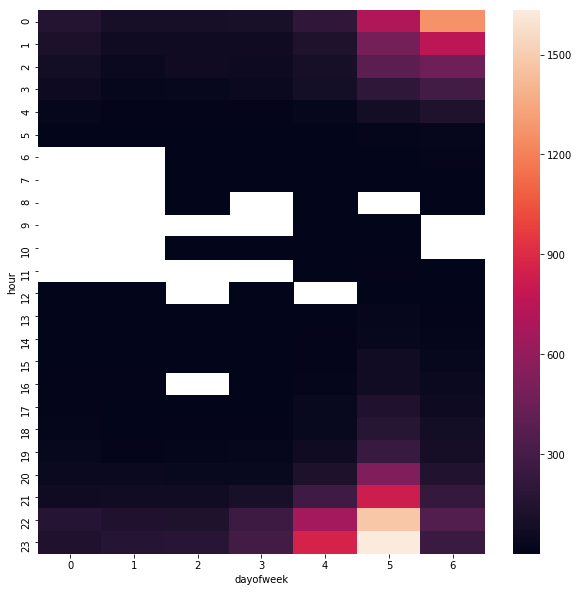

In [69]:
ht = pd.pivot_table(data=df[df.call_type=='PARTY'], 
                    values='incident_num', index=['hour'],columns=['dayofweek'],
                    aggfunc='count')

fig, ax = pyplot.subplots(figsize=(10,10))

sns.heatmap(ht, ax=ax)

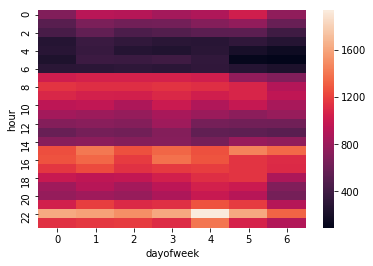

In [51]:
ht = pd.pivot_table(data=df[df.call_type=='1150'], 
                    values='incident_num', index=['hour'],columns=['dayofweek'],
                    aggfunc='count')
sns.heatmap(ht)

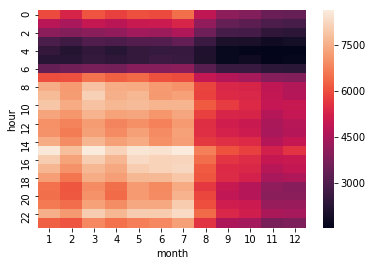

In [50]:
ht = pd.pivot_table(data=df, 
                    values='incident_num', index=['hour'],columns=['month'],
                    aggfunc='count')
sns.heatmap(ht)

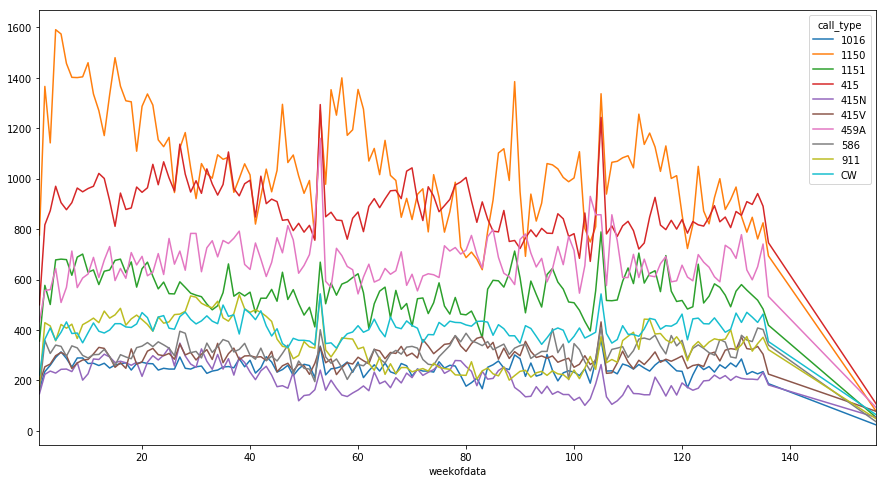

In [108]:
fig, ax = pyplot.subplots(figsize=(15,8))

top_ct = df.call_type.value_counts().iloc[:10]
top_ct

df_tct = df[df.call_type.isin(list(top_ct.index.values))]


ht = pd.pivot_table(data=df_tct, 
                    values='incident_num', index=['call_type'],columns=['weekofdata'],
                    aggfunc='count')

ht.T.plot(ax=ax)

#sns.heatmap(ht, robust = True, square=False, ax=ax)